In [1]:
import cv2
import numpy as np 
import pandas as pd 
import os

## Create Label Variable

In [2]:
labels = os.listdir(r"C:\\Users\\STUTI DUTTA\\Desktop\\amity\\Projects\\Drowsiness detection\\DL_Driver-drowsiness-detection-main\\train\\data")

In [3]:
labels
#Show label and create labels variable

['Closed', 'no_yawn', 'Open', 'yawn']

## Show a random image

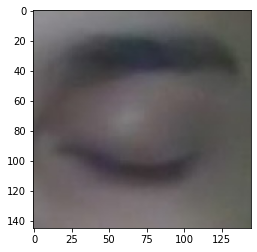

In [4]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread(r"C:\\Users\\STUTI DUTTA\\Desktop\\amity\\Projects\\Drowsiness detection\\DL_Driver-drowsiness-detection-main\\train\\data\\Closed\\_3.jpg"))

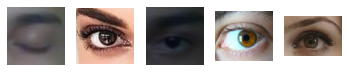

In [5]:
import matplotlib.pyplot as plt

# Load and display multiple images
image_paths = [r"C:\\Users\\STUTI DUTTA\\Desktop\\amity\\Projects\\Drowsiness detection\\DL_Driver-drowsiness-detection-main\\train\\data\\Closed\\_3.jpg", r"C:\\Users\\STUTI DUTTA\\Desktop\\amity\\Projects\\Drowsiness detection\\DL_Driver-drowsiness-detection-main\\train\\data\\Open\\_1.jpg", r"C:\\Users\\STUTI DUTTA\\Desktop\\amity\\Projects\\Drowsiness detection\\DL_Driver-drowsiness-detection-main\\train\\data\\Open\_2.jpg", r"C:\\Users\\STUTI DUTTA\\Desktop\\amity\\Projects\\Drowsiness detection\\DL_Driver-drowsiness-detection-main\\train\\data\\Open\_10.jpg",r"C:\\Users\\STUTI DUTTA\\Desktop\\amity\\Projects\\Drowsiness detection\\DL_Driver-drowsiness-detection-main\\train\\data\\Open\_20.jpg"]

num_images = len(image_paths)
fig, axes = plt.subplots(1, num_images)

for i, image_path in enumerate(image_paths):
    image = plt.imread(image_path)
    axes[i].imshow(image)
    axes[i].axis('off')

plt.show()

## Create a and show Image array

In [6]:
a = plt.imread(r"C:\\Users\\STUTI DUTTA\\Desktop\\amity\\Projects\\Drowsiness detection\\DL_Driver-drowsiness-detection-main\\train\\data\\yawn\10.jpg")

## Image shape

In [7]:
a.shape

(480, 640, 3)

## Display the image of a yawning face without the background, using the array representation of the face image. 


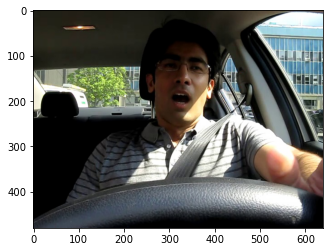

In [8]:
plt.imshow(plt.imread(r"C:\\Users\\STUTI DUTTA\\Desktop\\amity\\Projects\\Drowsiness detection\\DL_Driver-drowsiness-detection-main\\train\\data\\yawn\59.jpg"))

## Extract only the face region from both yawn and not_yawn images.

In [9]:
def face_for_yawn(direc=r"C:\\Users\\STUTI DUTTA\\Desktop\\amity\\Projects\\Drowsiness detection\\DL_Driver-drowsiness-detection-main\\train\\data", face_cas_path=r"C:\Users\STUTI DUTTA\Desktop\amity\Projects\Drowsiness detection\DL_Driver-drowsiness-detection-main\model\haarcascade\\haarcascade_frontalface_default.xml"):
    #C:\Users\STUTI DUTTA\Desktop\amity\Projects\Drowsiness detection\DL_Driver-drowsiness-detection-main\model\haarcascade
    yaw_no = []
    IMG_SIZE = 145
    categories = ["yawn", "no_yawn"]
    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
            face_cascade = cv2.CascadeClassifier(face_cas_path)
            faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
            for (x, y, w, h) in faces:
                img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
                roi_color = img[y:y+h, x:x+w]
                resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                yaw_no.append([resized_array, class_num1])
    return yaw_no


yawn_no_yawn = face_for_yawn()

0
1


## For Closed and Open eye

In [10]:
def get_data(dir_path=r"C:\\Users\\STUTI DUTTA\\Desktop\\amity\\Projects\\Drowsiness detection\\DL_Driver-drowsiness-detection-main\\train\\data", face_cas=r"C:\Users\\STUTI DUTTA\\Desktop\\amity\\Projects\\Drowsiness detection\\DL_Driver-drowsiness-detection-main\\model\\haarcascade\\haarcascade_frontalface_default.xml", eye_cas=r"C:\\Users\\STUTI DUTTA\\Desktop\\amity\\Projects\\Drowsiness detection\\DL_Driver-drowsiness-detection-main\\model\\haarcascade\\haarcascade.xml"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []
    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label)
        class_num +=2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(e)
    return data

In [11]:
data_train = get_data()

2
3


## Expand the dataset by adding more data and convert the data into an array format.

In [12]:
def append_data():
#     total_data = []
    yaw_no = face_for_yawn()
    data = get_data()
    yaw_no.extend(data)
    return np.array(yaw_no)

## New variable to store

In [13]:
new_data = append_data()

0
1
2
3


C:\Users\STUTI DUTTA\AppData\Local\Temp\ipykernel_4532\2804427426.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(yaw_no)


## Separate the labels and features in the dataset

In [14]:
X = []
y = []
for feature, label in new_data:
    X.append(feature)
    y.append(label)

## Reshape images X

In [15]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

## Perform label binarization.

In [16]:
!pip install scikit-learn

In [17]:
#import sklearn
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)

## Label array

In [18]:
y = np.array(y)

In [19]:
y

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

## Train Test split

In [20]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

## Length of X_test

In [21]:
len(X_test)

577

## Import some dependencies

In [22]:
from tensorflow.python.keras.layers import Lambda, Dropout
from tensorflow.python.keras.layers.advanced_activations import ELU, LeakyReLU, ReLU
from tensorflow.python.keras import activations
from keras import callbacks, layers, metrics, regularizers
from sklearn.metrics import confusion_matrix
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils
from tensorflow import keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization, Activation


## Data Augmentation

In [23]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)


#train_generator = tf.data.Dataset.from_tensor_slices((X_train, y_train))
#test_generator = tf.data.Dataset.from_tensor_slices((X_test, y_test))

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

# Build a Model

In [24]:
model = keras.models.Sequential()

model.add(Conv2D(filters= 256, kernel_size=(3, 3), activation="relu", input_shape=(145,145,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters= 128, kernel_size= (3, 3), activation="relu",kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters= 64, kernel_size= (3, 3), activation="relu",kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters= 32, kernel_size= (3, 3), activation="relu",kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Flatten())
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(4, activation="softmax"))

model.build(input_shape=(None, 145, 145, 3))
model.summary()

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 143, 143, 256)     7168      
                                                                 
 batch_normalization (BatchN  (None, 143, 143, 256)    1024      
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 71, 71, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 128)       295040    
                                                                 
 batch_normalization_1 (Batc  (None, 69, 69, 128)      512       
 hNormalization)                                                 
                                                        

In [25]:
# %% Plot the model
#keras.utils.plot_model(
#    model, "figs/ModelArchitecture.png",)

In [26]:
history = model.fit(train_generator, epochs=50, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator))

Epoch 1/50
43/43 [==============================] - 255s 6s/step - loss: 0.6743 - accuracy: 0.7385 - val_loss: 1.0570 - val_accuracy: 0.6118
Epoch 2/50
43/43 [==============================] - 258s 6s/step - loss: 0.4732 - accuracy: 0.8187 - val_loss: 1.1225 - val_accuracy: 0.4385
Epoch 3/50
43/43 [==============================] - 252s 6s/step - loss: 0.3429 - accuracy: 0.8752 - val_loss: 1.4959 - val_accuracy: 0.4419
Epoch 4/50
43/43 [==============================] - 251s 6s/step - loss: 0.3154 - accuracy: 0.8782 - val_loss: 2.2774 - val_accuracy: 0.3744
Epoch 5/50
43/43 [==============================] - 252s 6s/step - loss: 0.3481 - accuracy: 0.8640 - val_loss: 2.4703 - val_accuracy: 0.3934
Epoch 6/50
43/43 [==============================] - 250s 6s/step - loss: 0.3952 - accuracy: 0.8484 - val_loss: 1.4812 - val_accuracy: 0.6153
Epoch 7/50
43/43 [==============================] - 253s 6s/step - loss: 0.3512 - accuracy: 0.8707 - val_loss: 1.6215 - val_accuracy: 0.5286
Epoch 8/50
43

In [27]:
# Add Callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', mode='min', patience=5, verbose=1)
mcp_save = tf.keras.callbacks.ModelCheckpoint(
    'model_best.h5', save_best_only=True, monitor='val_loss', mode='min')
callbacks = [early_stopping, mcp_save]

# Train model

In [28]:
#from here
history = model.fit(train_generator, epochs=50, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator), callbacks=callbacks)

Epoch 1/50
43/43 [==============================] - 189s 4s/step - loss: 0.0798 - accuracy: 0.9695 - val_loss: 0.9745 - val_accuracy: 0.8232
Epoch 2/50
43/43 [==============================] - 204s 5s/step - loss: 0.0893 - accuracy: 0.9695 - val_loss: 0.2153 - val_accuracy: 0.9497
Epoch 3/50
43/43 [==============================] - 208s 5s/step - loss: 0.0941 - accuracy: 0.9651 - val_loss: 0.1930 - val_accuracy: 0.9480
Epoch 4/50
43/43 [==============================] - 202s 5s/step - loss: 0.0885 - accuracy: 0.9643 - val_loss: 0.2079 - val_accuracy: 0.9463
Epoch 5/50
43/43 [==============================] - 196s 5s/step - loss: 0.0923 - accuracy: 0.9643 - val_loss: 0.1050 - val_accuracy: 0.9653
Epoch 6/50
43/43 [==============================] - 187s 4s/step - loss: 0.0729 - accuracy: 0.9703 - val_loss: 0.2857 - val_accuracy: 0.9237
Epoch 7/50
43/43 [==============================] - 188s 4s/step - loss: 0.0761 - accuracy: 0.9673 - val_loss: 0.1396 - val_accuracy: 0.9428
Epoch 8/50
43

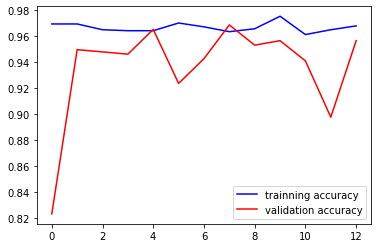

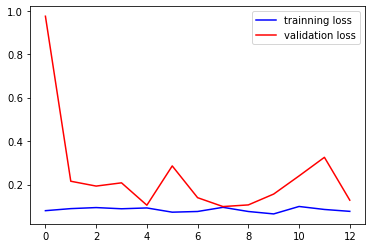

In [35]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [36]:
model.save("drowiness_new.h5")

In [37]:
model.save("drowiness_new.model")

INFO:tensorflow:Assets written to: drowiness_new.model\assets


INFO:tensorflow:Assets written to: drowiness_new.model\assets


## History

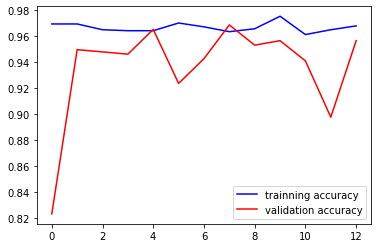

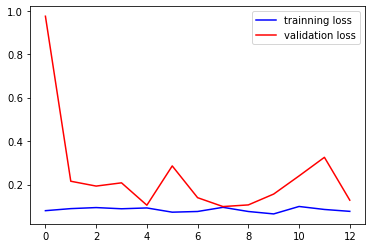

In [38]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

## Save Model

In [39]:
model.save("drowiness_new2.h5")

In [40]:
model.save("drowiness_new2.model")

INFO:tensorflow:Assets written to: drowiness_new2.model\assets


INFO:tensorflow:Assets written to: drowiness_new2.model\assets


# Prediction

In [41]:
# Make predictions
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

19/19 [==============================] - 15s 777ms/step


In [42]:
predicted_classes

array([3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 0, 0, 0,
       3, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3,
       3, 0, 3, 3, 3, 0, 0, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 3,
       3, 3, 3, 0, 0, 3, 3, 3, 0, 0, 0, 3, 0, 3, 3, 0, 3, 3, 3, 3, 0, 0,
       3, 3, 0, 3, 3, 3, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 3, 0,
       0, 0, 3, 0, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 3, 3, 0, 3, 0, 3, 0,
       0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 3, 0,
       3, 0, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0,
       3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 1, 3, 2, 0,
       3, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0,
       0, 0, 3, 3, 3, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3, 3, 0, 3, 0, 0, 0,
       0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 3, 0, 0, 3, 3, 0, 3,
       3, 3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 3, 3,
       3, 0, 0, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 3, 0,

# classification report

In [43]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]

In [44]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1), predicted_classes, target_names=labels_new))

              precision    recall  f1-score   support

        yawn       0.25      0.98      0.40        63
     no_yawn       0.00      0.00      0.00        72
      Closed       1.00      0.01      0.02       212
        Open       0.60      0.87      0.71       230

    accuracy                           0.46       577
   macro avg       0.46      0.46      0.28       577
weighted avg       0.64      0.46      0.33       577



# predicting function

In [45]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]
IMG_SIZE = 145
def prepare(filepath, face_cas="../input/prediction-images/haarcascade_frontalface_default.xml"):
    try:
        img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
        img_array = img_array / 255
        resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
    except Exception as e:
        print("Error occurred while reading the image file:", e)
        return None

model = tf.keras.models.load_model("./drowiness_new2.h5")

# Prediction 
## 0-yawn, 1-no_yawn, 2-Closed, 3-Open

In [46]:
prediction = model.predict([prepare(r"C:\\Users\\STUTI DUTTA\\Desktop\\amity\\Projects\\Drowsiness detection\\DL_Driver-drowsiness-detection-main\\train\\data\\Closed\_100.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 131ms/step


2

In [47]:
prediction = model.predict([prepare(r"C:\\Users\\STUTI DUTTA\\Desktop\\amity\\Projects\\Drowsiness detection\\DL_Driver-drowsiness-detection-main\\train\\data\\Closed\_120.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 50ms/step


2

In [48]:
prediction = model.predict([prepare(r"C:\\Users\\STUTI DUTTA\\Desktop\\amity\\Projects\\Drowsiness detection\\DL_Driver-drowsiness-detection-main\\train\\data\\yawn\12.jpg")])
np.argmax(prediction)


1/1 [==============================] - 0s 81ms/step


0

In [49]:
'''
'''import os
import tensorflow as tf

# Print the current working directory
print("Current Working Directory:", os.getcwd())

# List files in the current directory
print("Files in Current Directory:", os.listdir("."))

# Load the model
model_path = "./drowiness_new2.h5"
if os.path.exists(model_path):
    model = tf.keras.models.load_model(model_path)
    print("Model loaded successfully.")
else:
    print(f"Model file not found at {model_path}")


Current Working Directory: C:\Users\STUTI DUTTA\DrowsinessDetection\New Start
Files in Current Directory: ['.ipynb_checkpoints', 'alarm.mp3', 'CNN_model.h5', 'config.py', 'driver-drowsiness_notebook.ipynb', 'drowiness_new.h5', 'drowiness_new.model', 'drowiness_new2.h5', 'drowiness_new2.model', 'main.ipynb', 'main.py', 'model_best.h5', 'trial1.ipynb']
Model loaded successfully.
